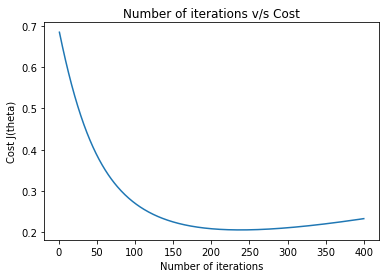

In [108]:
#Humble try to implement logistic regression 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataset = pd.read_csv("/Users/admin/Desktop/machine-learning-ex/ex2/ex2data1.txt")

X = dataset.iloc[:,:2].to_numpy().reshape(dataset.shape[0],dataset.ndim)
y = dataset.iloc[:,2].to_numpy().reshape(dataset.shape[0],1)

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

# Normalize the dataset, as log(hypothesis) has issues otherwise
X = X - mu
X = X / sigma

x_zero = np.ones((X.shape[0],1))

# New feature matrix
X = np.hstack((x_zero,X))

# Assign the number of rows and columns
m = X.shape[0]
n = X.shape[1]

theta = np.zeros((n,1))

def sigmoid(theta, X):
    '''
    Calculate the hypothesis function
    '''
    z = np.dot(X,theta)
    hypothesis = 1/(1 + np.exp(-z))
    
    return hypothesis

hypothesis = sigmoid(theta, X)

def computeCost(theta, X, y):
    '''
    Calculate the log loss cost function
    '''
    hypothesis = sigmoid(theta, X)
    cost = -1/m * (np.dot(y.transpose(),np.log(hypothesis)) + np.dot((1-y.transpose()),np.log(1-hypothesis)))
    return cost
    
cost = computeCost(theta, X, y)

def computeGradients(theta, X, y):
    '''
    Calculate the gradients of the theta
    '''
    
    hypothesis = sigmoid(theta, X)
    gradients = 1/m * np.dot(X.transpose(),(hypothesis - y))
    return gradients

gradients = computeGradients(theta, X, y)

def gradientDescent(theta, X, y, alpha, gradients, num_iters):
    '''
    Minimize the theta using gradient descent algorithm
    '''
    J_hist = np.empty((0,1))
    
    for i in range(num_iters):
        theta = theta - (alpha * gradients)
        J_hist = np.append(J_hist,computeCost(theta, X, y),axis = 0)
        
    return theta, J_hist

alpha = 0.06
num_iters = 400
min_theta, J_hist = gradientDescent(theta, X, y, alpha, gradients, num_iters)

x_s = [i + 1 for i in range(num_iters)]

# Flatten the cost array
y_s = J_hist.flatten()

plt.plot(x_s,y_s)
plt.xlabel("Number of iterations")
plt.ylabel("Cost J(theta)")
plt.title("Number of iterations v/s Cost")
plt.show()

**Note**:

When implementing logistic regression without regularization there is a chance of running into the following error:

*divide by zero encountered in log* while trying to implement the gradient descent algorithm to optimize the theta and minimize the cost. It took me quite a while to understand this error so I am providing all of my experiences here so that you can better understand the reason for this error. One of the solutions that was helpful for me was the reply by *Mayur* in the stack overflow forum, the link for which is attached below:

https://stackoverflow.com/questions/36229340/divide-by-zero-encountered-in-log-when-not-dividing-by-zero/36229376

Another important thing to note is that in the implementation of logistic regression for the dataset, without using the regularization, the cost of increases and the gradient decent algorithm does not converge and the cost starts increasing which is a sign of overfitting. 

The regularized implementation takes care of the overfitting problem which is clearly visible from the plot below.

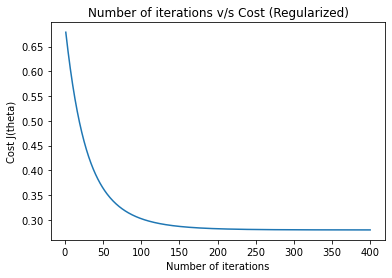

In [110]:
#Humble try to implement logistic regression with regularization

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataset = pd.read_csv("/Users/admin/Desktop/machine-learning-ex/ex2/ex2data1.txt")

X = dataset.iloc[:,:2].to_numpy().reshape(dataset.shape[0],dataset.ndim)
y = dataset.iloc[:,2].to_numpy().reshape(dataset.shape[0],1)

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

# Normalize the dataset, as log(hypothesis) has issues otherwise
X = X - mu
X = X / sigma

x_zero = np.ones((X.shape[0],1))

# New feature matrix
X = np.hstack((x_zero,X))

# Assign the number of rows and columns
m = X.shape[0]
n = X.shape[1]

theta = np.zeros((n,1))

def sigmoid(theta, X):
    '''
    Calculate the hypothesis function
    '''
    z = np.dot(X,theta)
    hypothesis = 1/(1 + np.exp(-z))
    
    return hypothesis

hypothesis = sigmoid(theta, X)

theta[0] = 0

lmbda = 10

def computeCost(theta, X, y, lmbda):
    '''
    Calculate the log loss cost function
    '''
    hypothesis = sigmoid(theta, X)
    cost = (-1/m * (np.dot(y.transpose(),np.log(hypothesis)) + np.dot((1-y.transpose()),np.log(1-hypothesis)))) 
    + (lmbda/2*m * np.square(theta))
    return cost
    
cost = computeCost(theta, X, y, lmbda)

def computeGradients(theta, X, y):
    '''
    Calculate the gradients of the theta
    '''
    
    hypothesis = sigmoid(theta, X)
    gradients = (1/m * np.dot(X.transpose(),(hypothesis - y))) 
    return gradients

gradients = computeGradients(theta, X, y)

def gradientDescent(theta, X, y, alpha, lmbda, gradients, num_iters):
    '''
    Minimize the theta using gradient descent algorithm
    '''
    J_hist = np.empty((0,1))
    
    for i in range(num_iters):
        theta = theta * (1 - (alpha * lmbda)/m) - (alpha * gradients)
        theta[0] = 0
        J_hist = np.append(J_hist,computeCost(theta, X, y, lmbda),axis = 0)
        
    return theta, J_hist

alpha = 0.1
num_iters = 400
min_theta, J_hist = gradientDescent(theta, X, y, alpha, lmbda, gradients, num_iters)

x_s = [i + 1 for i in range(num_iters)]

# Flatten the cost array
y_s = J_hist.flatten()

plt.plot(x_s,y_s)
plt.xlabel("Number of iterations")
plt.ylabel("Cost J(theta)")
plt.title("Number of iterations v/s Cost (Regularized)")
plt.show()